# Machine Learning with TensorFlow

### what is a tensor ?
In an m-dimensional space, a tensor of rank n is a mathematical object that has n indices, m^n components, and obeys certain transformaion rules.

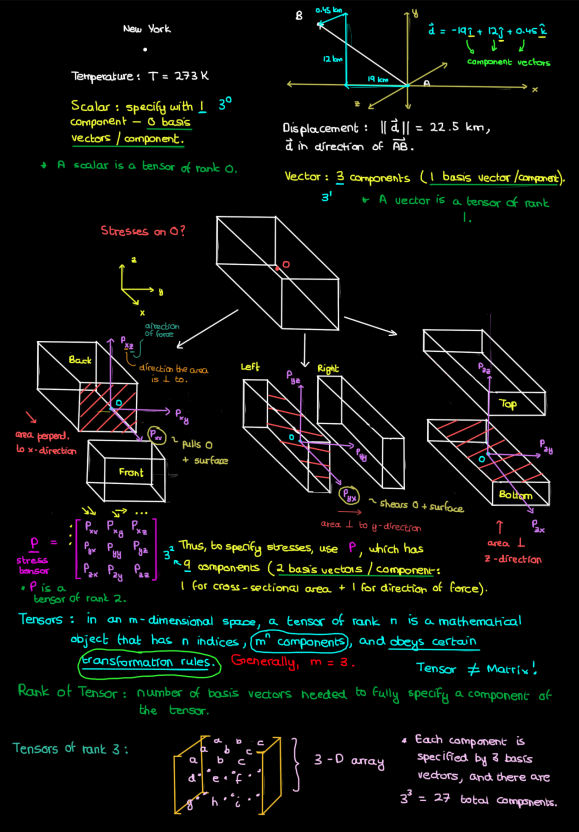

Transformation Rules:
1) A tensor is an object that trasnsforms like a tensor.
2) A tensor is an object that is invariant under a change of coordinae systems, with compnents that change according to a special set of mathematical formuae.

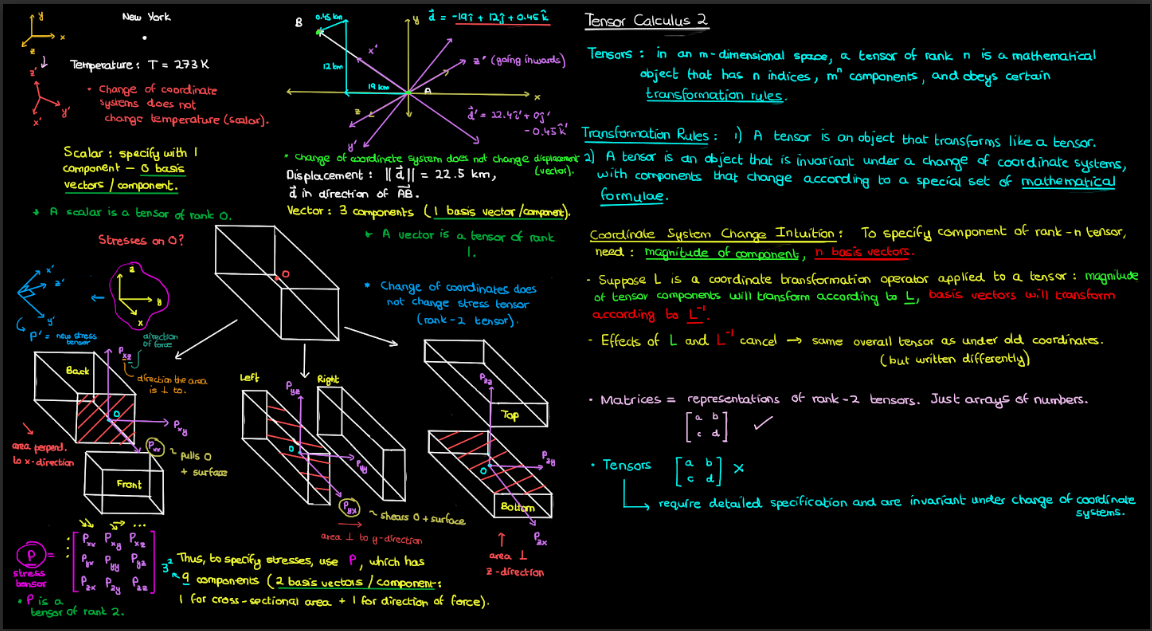


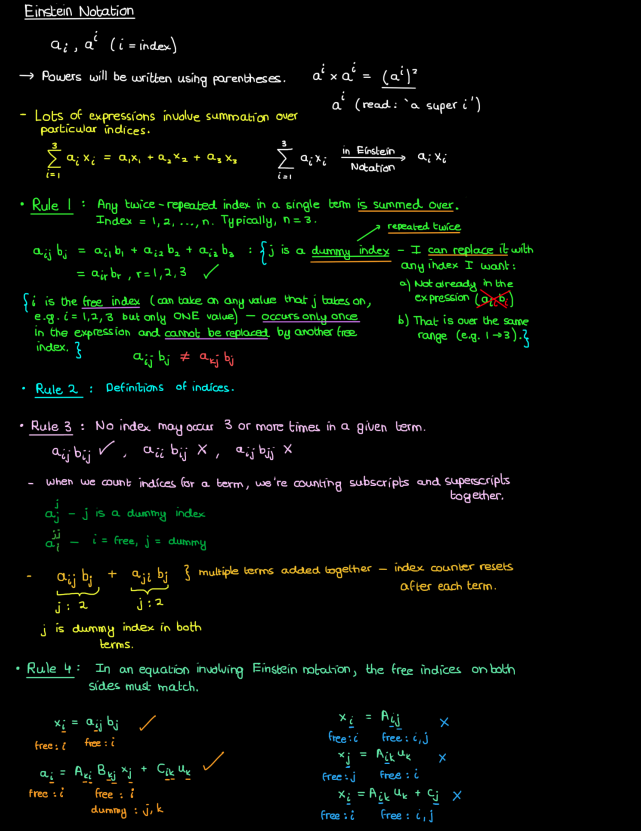

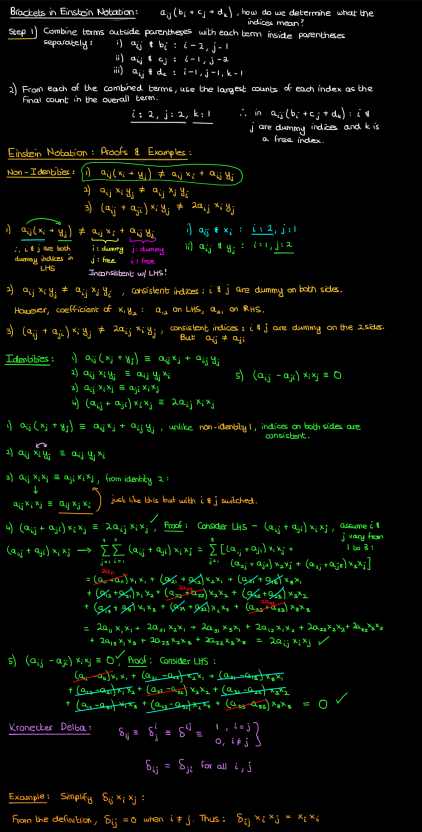

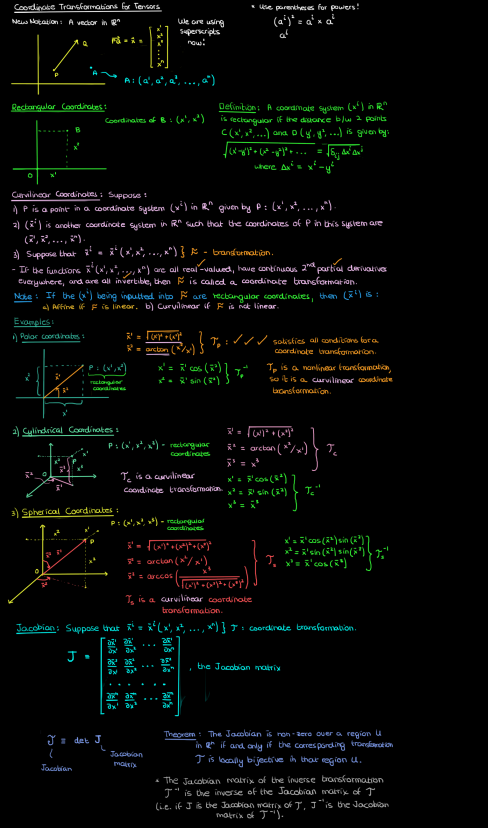

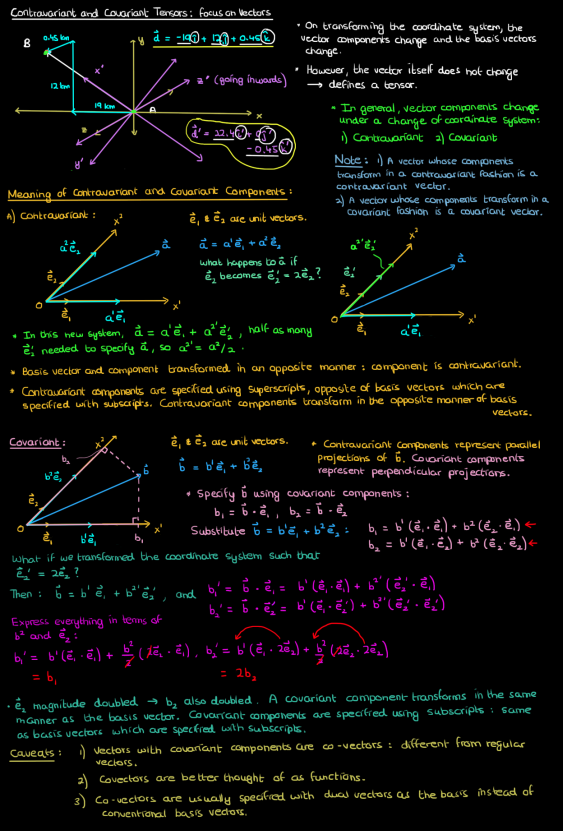

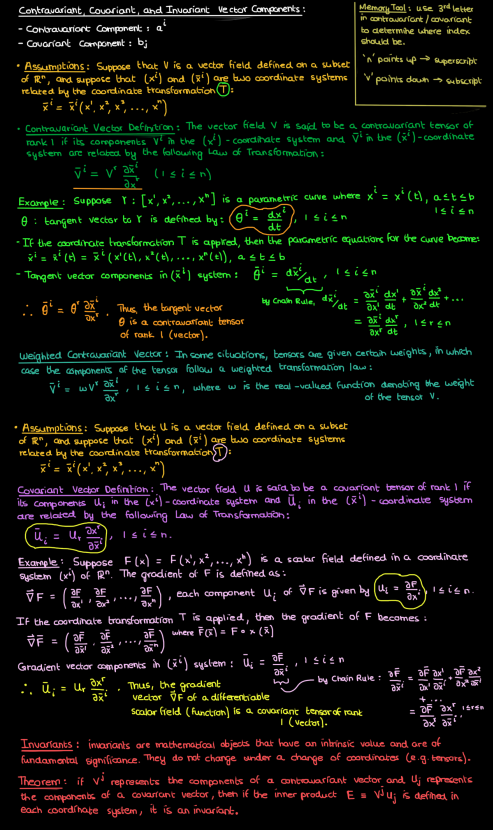

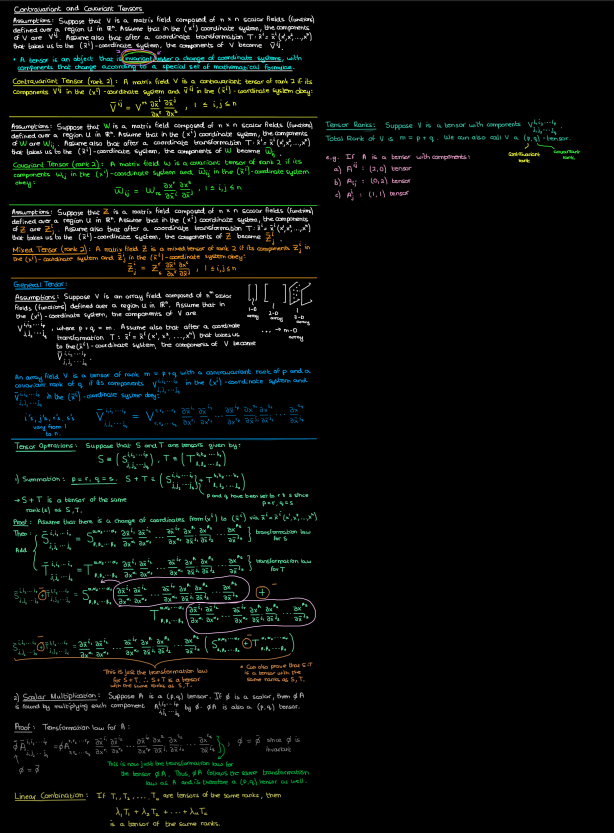
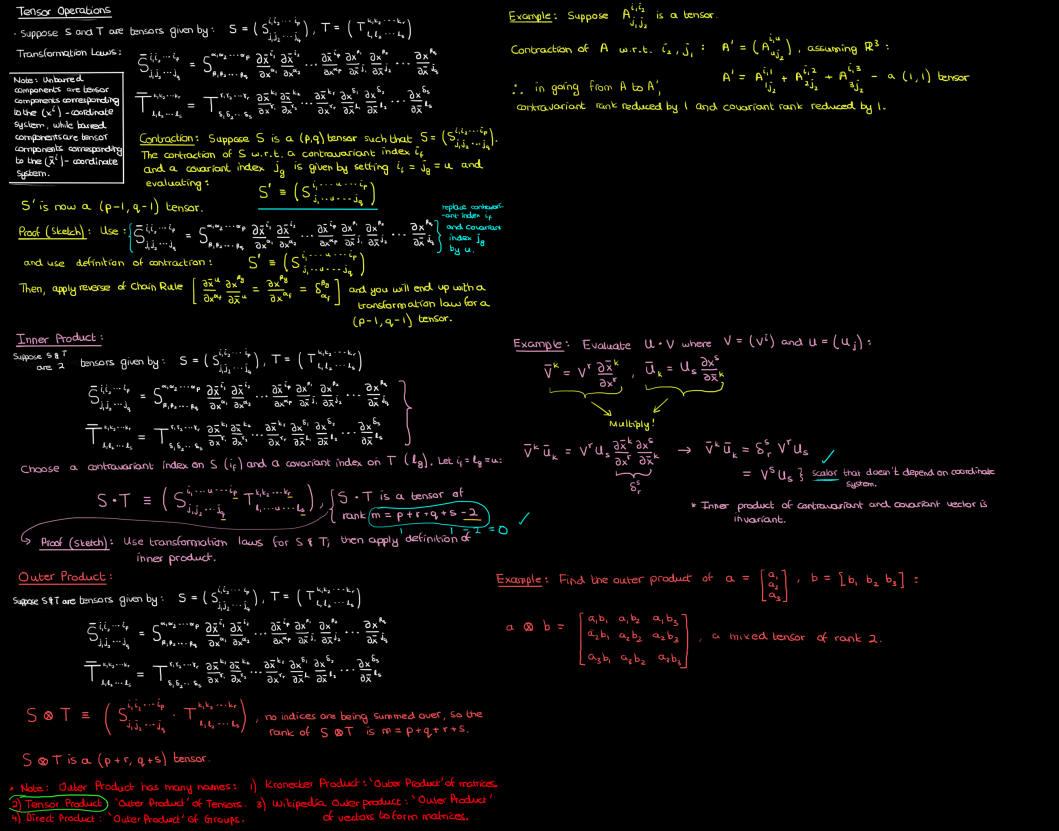

### what is tensorflow ?
[TensorFlow](https://www.tensorflow.org/) is an open-source end-to-end machine learning library for preprocessing data, modelling data and serving models (getting them into the hands of others).

## Why use TensorFlow?

Rather than building machine learning and deep learning models from scratch, it's more likely you'll use a library such as TensorFlow. This is because it contains many of the most common machine learning functions you'll want to use.


In [1]:
# Import tensorflow
import tensorflow as tf

In [2]:
tf.__version__

'2.11.0'

### Creating Tensors with `tf.constant()`

In general, we usually won't create tensors ourself. This is because TensorFlow has modules built-in (such as [`tf.io`](https://www.tensorflow.org/api_docs/python/tf/io) and [`tf.data`](https://www.tensorflow.org/guide/data)) which are able to read your data sources and automatically convert them to tensors and then later on, neural network models will process these for us.


In [14]:
# Let's create a function to get tensor details

def tensor_attr(tensor_obj):
    # Get various attributes of tensor
    print("Datatype of every element:", tensor_obj.dtype)
    print("Number of dimensions (rank) a.k.a basis vectors:", tensor_obj.ndim)
    print("Shape of tensor:", tensor_obj.shape)
    if len(tensor_obj.shape) > 0: # 
        print("Elements along axis 0 of tensor:", tensor_obj.shape[0])
        print("Elements along last axis of tensor:", tensor_obj.shape[-1])
        print("Total number of elements (m*n*k...):", tf.size(tensor_obj).numpy()) # .numpy() converts to NumPy array
    #print('Tensor shape: {}, size: {}, rank: {}'.format(tensor_obj.shape()))
    else:
        pass

In [4]:
# Create a scalar (rank 0 tensor)
scalar = tf.constant(77)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=77>

In [15]:
tensor_attr(scalar)

Datatype of every element: <dtype: 'int32'>
Number of dimensions (rank) a.k.a basis vectors: 0
Shape of tensor: ()


In [9]:
# Create a vector (more than 0 dimensions)
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [16]:
tensor_attr(vector)

Datatype of every element: <dtype: 'int32'>
Number of dimensions (rank) a.k.a basis vectors: 1
Shape of tensor: (2,)
Elements along axis 0 of tensor: 2
Elements along last axis of tensor: 2
Total number of elements (m*n*k...): 2


In [17]:
# Create a matrix (more than 1 dimension)
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [18]:
tensor_attr(matrix)

Datatype of every element: <dtype: 'int32'>
Number of dimensions (rank) a.k.a basis vectors: 2
Shape of tensor: (2, 2)
Elements along axis 0 of tensor: 2
Elements along last axis of tensor: 2
Total number of elements (m*n*k...): 4


By default, TensorFlow creates tensors with either an `int32` or `float32` datatype.

This is known as [32-bit precision](https://en.wikipedia.org/wiki/Precision_(computer_science) (the higher the number, the more precise the number, the more space it takes up on your computer).

In [22]:
# Create another_matrix and define the data type for it
another_matrix = tf.constant([[1,9],
                             [2,8]], dtype=tf.float16) # assign dtype as tf dtype
tensor_attr(another_matrix)

Datatype of every element: <dtype: 'float16'>
Number of dimensions (rank) a.k.a basis vectors: 2
Shape of tensor: (2, 2)
Elements along axis 0 of tensor: 2
Elements along last axis of tensor: 2
Total number of elements (m*n*k...): 4


In [46]:
# Let's create a tensor with higher dimension lets say 5 dimensions
tensor = tf.constant([
                    [
                                            [
                                                            [   
                                                                [11, 11, 11, 11, 11],
                                                                [10, 10, 10, 10, 10],
                                                                [29, 29, 29, 29, 29],
                                                                [28, 28, 28, 28, 28]
                                                            ],
                                                            [   
                                                                [27, 27, 27, 27, 27],
                                                                [26, 26, 26, 26, 26],
                                                                [25, 25, 25, 25, 25],
                                                                [24, 24, 24, 24, 24]
                                                            ],
                                                            [   
                                                                [23, 23, 23, 23, 23],
                                                                [22, 22, 22, 22, 22],
                                                                [21, 21, 21, 21, 21],
                                                                [20, 20, 20, 20, 20]
                                                            ]
                                            ],
                                            [
                                                            [   
                                                                [11, 11, 11, 11, 11],
                                                                [10, 10, 10, 10, 10],
                                                                [9, 9, 9, 9, 9],
                                                                [8, 8, 8, 8, 8]
                                                            ],
                                                            [   
                                                                [7, 7, 7, 7, 7],
                                                                [6, 6, 6, 6, 6],
                                                                [5, 5, 5, 5, 5],
                                                                [4, 4, 4, 4, 4]
                                                            ],
                                                            [   
                                                                [3, 3, 3, 3, 3],
                                                                [2, 2, 2, 2, 2],
                                                                [1, 1, 1, 1, 1],
                                                                [0, 0, 0, 0, 0]
                                                            ]
                                            ]
                     ]
                    ], dtype=tf.float16)
tensor_attr(tensor)

Datatype of every element: <dtype: 'float16'>
Number of dimensions (rank) a.k.a basis vectors: 5
Shape of tensor: (1, 2, 3, 4, 5)
Elements along axis 0 of tensor: 1
Elements along last axis of tensor: 5
Total number of elements (m*n*k...): 120


### Creating Tensors with `tf.Variable()`

You can also (although you likely rarely will, because often, when working with data, tensors are created for you automatically) create tensors using [`tf.Variable()`](https://www.tensorflow.org/api_docs/python/tf/Variable).

The difference between `tf.Variable()` and `tf.constant()` is tensors created with `tf.constant()` are immutable (can't be changed, can only be used to create a new tensor), where as, tensors created with `tf.Variable()` are mutable (can be changed).